# Neural Networks for Non-Linear Regression

## Table of Contents

#### Import the Dataset
#### Review the Data
#### Train the Model
#### Evaluate Model Performance

## Import the dataset

In [1]:
#Import libraries
from tabulate import tabulate
import pandas as pd

In [2]:
#Import the CSV File
import pandas as pd

df = pd.read_csv("concrete_data.csv", sep=";", header=0)

#Print the dataframe to check it
print(tabulate(df, headers='keys', tablefmt='psql'))

+------+----------+--------+-----------+---------+--------------------+--------------------+------------------+-------+------------------------+
|      |   cement |   slag |   fly_ash |   water |   superplasticizer |   coarse_aggregate |   fine_aggregate |   age |   compressive_strength |
|------+----------+--------+-----------+---------+--------------------+--------------------+------------------+-------+------------------------|
|    0 |    540   |    0   |       0   |   162   |                2.5 |             1040   |            676   |    28 |                  79.99 |
|    1 |    540   |    0   |       0   |   162   |                2.5 |             1055   |            676   |    28 |                  61.89 |
|    2 |    332.5 |  142.5 |       0   |   228   |                0   |              932   |            594   |   270 |                  40.27 |
|    3 |    332.5 |  142.5 |       0   |   228   |                0   |              932   |            594   |   365 |           

In [3]:
#Normalize the data
from sklearn.preprocessing import StandardScaler

X = df.drop(['compressive_strength'], axis=1)
y = df.compressive_strength

#assign the df to a new variable
X_norm = X

# Normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

#normalize the values and save them to the new dataframe
for index, row in X_norm.iterrows():
    X_norm.at[index, 'cement'] = X_normalized[index, 0]
    X_norm.at[index, 'slag'] = X_normalized[index, 1]
    X_norm.at[index, 'fly_ash'] = X_normalized[index, 2]
    X_norm.at[index, 'water'] = X_normalized[index, 3]
    X_norm.at[index, 'superplasticizer'] = X_normalized[index, 4]
    X_norm.at[index, 'coarse_aggregate'] = X_normalized[index, 5]
    X_norm.at[index, 'fine_aggregate'] = X_normalized[index, 6]
    X_norm.at[index, 'age'] = X_normalized[index, 7]


print(tabulate(X_norm, headers='keys', tablefmt='psql'))

/tmp/ipykernel_21641/3017783647.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.27973311313256866' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_norm.at[index, 'age'] = X_normalized[index, 7]


+------+-------------+------------+------------+-------------+--------------------+--------------------+------------------+-----------+
|      |      cement |       slag |    fly_ash |       water |   superplasticizer |   coarse_aggregate |   fine_aggregate |       age |
|------+-------------+------------+------------+-------------+--------------------+--------------------+------------------+-----------|
|    0 |  2.47791    | -0.856888  | -0.847144  | -0.916764   |       -0.620448    |         0.863154   |      -1.21767    | -0.279733 |
|    1 |  2.47791    | -0.856888  | -0.847144  | -0.916764   |       -0.620448    |         1.05616    |      -1.21767    | -0.279733 |
|    2 |  0.491425   |  0.795526  | -0.847144  |  2.17546    |       -1.03914     |        -0.526517   |      -2.24092    |  3.55307  |
|    3 |  0.491425   |  0.795526  | -0.847144  |  2.17546    |       -1.03914     |        -0.526517   |      -2.24092    |  5.05768  |
|    4 | -0.790459   |  0.678408  | -0.847144  |

## Review the Data

It's always a good idea to plot the features and target of your data set to understand it.

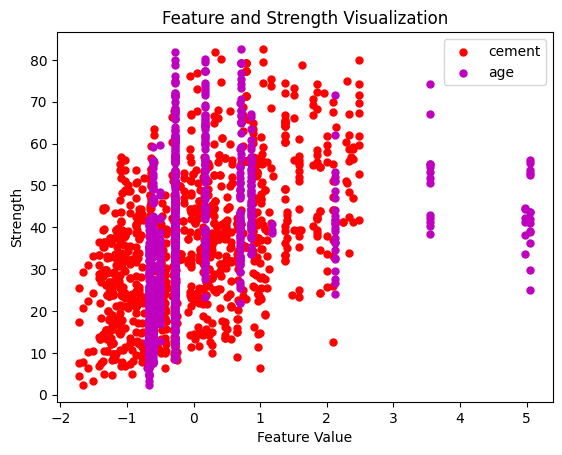

In [4]:
#Plot features against target (strength)

import matplotlib.pyplot as plt

# plot select features against the strength
plt.scatter(X['cement'], y, s=25, c='r', label = "cement")
plt.scatter(X['age'], y, s=25, c='m', label = "age")
plt.title('Feature and Strength Visualization')
plt.xlabel('Feature Value') 
plt.ylabel('Strength')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Top-Down View')

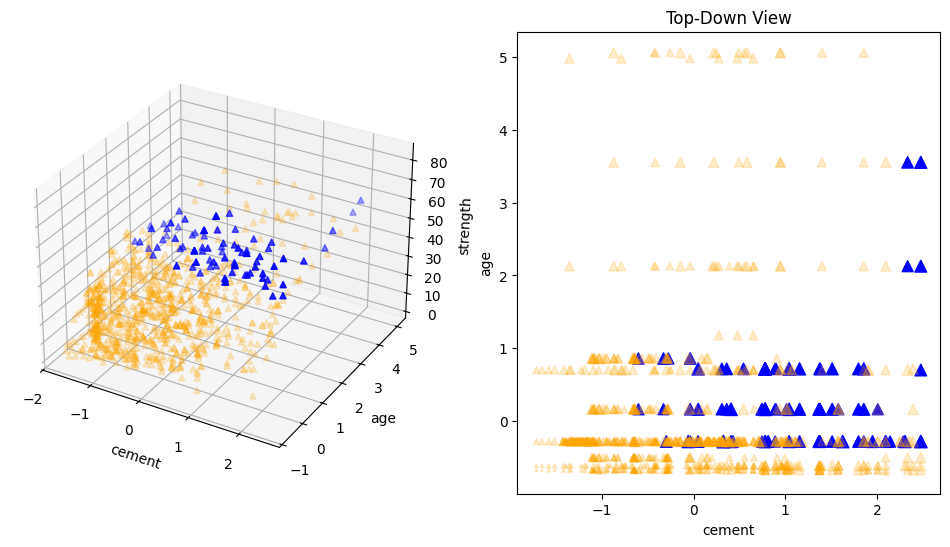

In [6]:
#plot 2 features against the target (strength) with strength represented in the Z axis
#use the Z filter to visualize points with strengths above a threshold

import numpy as np

#set Z filter value here
z_filter = 60

#3D plot to compare 2 features against the target
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')

# Filter points where z < z_filter value
mask_over_filter = y >= z_filter
mask_under_filter = y < z_filter

# Create a scatter plot with filtered points
ax.scatter(X['cement'][mask_over_filter], X['age'][mask_over_filter], y[mask_over_filter], marker='^', color='blue')
ax.scatter(X['cement'][mask_under_filter], X['age'][mask_under_filter], y[mask_under_filter], marker='^', color='orange', alpha = 0.2)

ax.set_xlabel('cement')
ax.set_ylabel('age')
ax.set_zlabel('strength')

ax2 = fig.add_subplot(122)
ax2.scatter(X['cement'][mask_over_filter], X['age'][mask_over_filter], y[mask_over_filter], marker='^', color='blue')
ax2.scatter(X['cement'][mask_under_filter], X['age'][mask_under_filter], y[mask_under_filter], marker='^', color='orange', alpha = 0.2)

# Set labels for the top view plot
ax2.set_xlabel('cement')
ax2.set_ylabel('age')
ax2.set_title('Top-Down View')

## Train the model

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3,random_state=42) # 70% training and 30% test

In [ ]:
#Train a regression model using the MLPRegressor function
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
y_pred = mlp.predict(X_test)

print('training complete')

In [ ]:
#Plot the loss function
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(mlp.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

### Evaluate model performance

Check the documentation to see what the .score() function returns
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score

In [ ]:
mlp.score(X_test, y_test)

Look at other metrics like Root Mean Squared Error and Mean Absolute Error

In [ ]:
from sklearn.metrics import root_mean_squared_error

y_true = y_test
y_pred = mlp.predict(X_test)

rmse = root_mean_squared_error(y_true, y_pred)
print(rmse)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

These metrics are relative to the scale of your output data. In our dataset, we measure the strength in MPa. It can be helpful to compare the errors against values in your dataset to understand the scale of the error.

In [ ]:
lowest_value = df['compressive_strength'].min()
highest_value = df['compressive_strength'].max()
median_value = df['compressive_strength'].median()
mean_value = df['compressive_strength'].mean()

# Print the results
print(f"Lowest value: {lowest_value}")
print(f"Highest value: {highest_value}")
print(f"Median value: {median_value}")
print(f"Mean value: {mean_value}")

In [ ]:
percentage_median = round(rmse / median_value*100, 2)
percentage_min = round(rmse / lowest_value*100, 2)
percentage_max = round(rmse / highest_value*100, 2)

print("RMSE is {}% of the median value of the dataset".format(percentage_median))
print("RMSE is {}% of the minimum value of the dataset".format(percentage_min))
print("RMSE is {}% of the maximum value of the dataset".format(percentage_max))

In [ ]:
percentage_median = round(mae / median_value*100, 2)
percentage_min = round(mae / lowest_value*100, 2)
percentage_max = round(mae / highest_value*100, 2)

print("RMSE is {}% of the median value of the dataset".format(percentage_median))
print("RMSE is {}% of the minimum value of the dataset".format(percentage_min))
print("RMSE is {}% of the maximum value of the dataset".format(percentage_max))